<a href="https://colab.research.google.com/github/Yashwati-patel/Transport_Demand_Prediction/blob/main/Final_Notebook_of_Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

###** Variables description:**

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [497]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [498]:
# importibg file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [499]:
import datetime

In [500]:
# import csv file
Dataset = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT-1/train_revised.csv')

In [501]:
Dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [502]:
Dataset.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [503]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [504]:
Dataset.dtypes

ride_id             int64
seat_number        object
payment_method     object
payment_receipt    object
travel_date        object
travel_time        object
travel_from        object
travel_to          object
car_type           object
max_capacity        int64
dtype: object

In [505]:
Dataset.shape

(51645, 10)

In [506]:
Dataset.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


In [507]:
Dataset.describe(include= 'object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985




*  There are total 61 unique seats in this dataset.

*  Travelers have used 2 types of payment method and most of the people have use **Mpesa** to pay for their ticket.

*  The record of 149 days out of 2 year present in  this dataset.

*  There are 2 different types of car and most of them are Bus.







In [508]:
# finding null values
Dataset.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

we can see there is no null values

In [509]:
len(Dataset['ride_id'].unique())

6249

we can see there are 6249 unique ride_id

In [510]:
Dataset.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

# Exploratory Analysis And Visualization

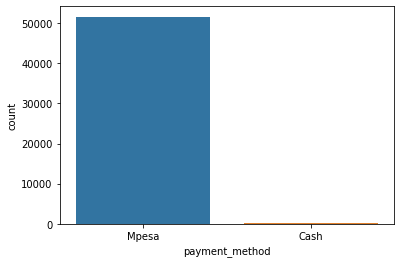

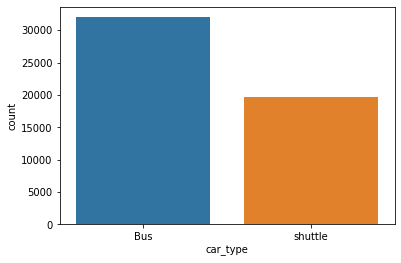

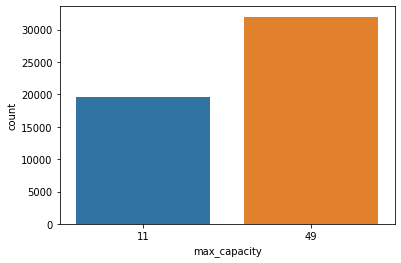

In [511]:
plot_count_cols = ['payment_method','car_type','max_capacity']

for plots in plot_count_cols:
  sns.countplot(Dataset[plots])
  plt.show()


*  we can see there are 2 type of paynent methods people have used to but tickets.
*   There are 2 types of car Bus and Shuttle and the maximum capacity of the Bus is 49 while Shuttle can contain 11 travelers.

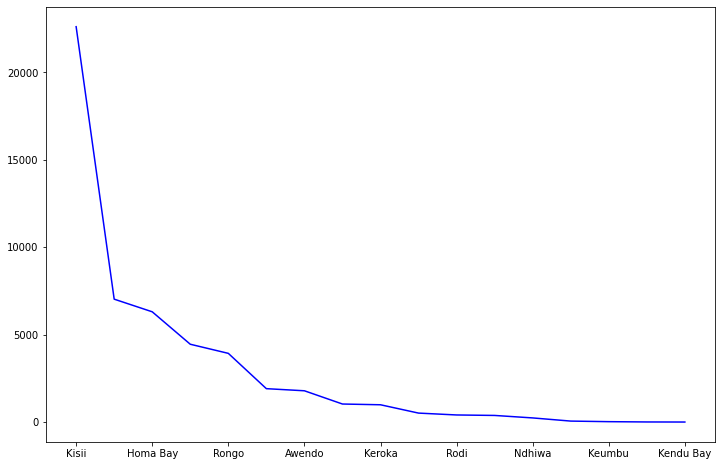

In [512]:
Dataset['travel_from'].value_counts().plot(kind='line', color='blue', figsize=(12,8))
plt.show()

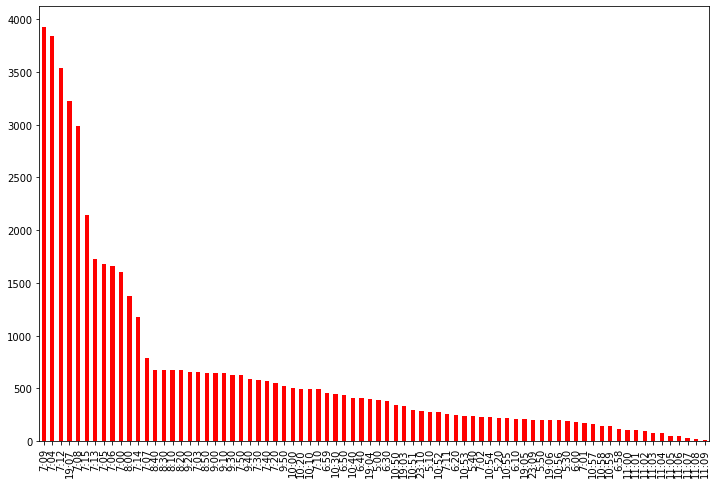

In [513]:
Dataset['travel_time'].value_counts().plot(kind='bar', color='red', figsize=(12,8))
plt.show()

we are not given the target variable so we need to find target variable.

There might be many ways of finding the target variable but here i am using one way that is i will find the count of each ride_id and that will be the number_of_ticket as our target variable.

In [514]:
lable=Dataset.groupby(['ride_id']).seat_number.count().rename('number_of_ticket').reset_index()
lable.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


Now we found our target variable so let us delete the duplicate values from ride_id.

In [515]:
Dataset = Dataset.drop_duplicates('ride_id')

In [516]:
Dataset.shape

(6249, 10)

Now let us merge two datasets on ride_id key to make the final dataset where we have dependent as well as independent variables too.

In [517]:
Dataset =Dataset.merge(lable, how='left',on='ride_id')
Dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model.

In [518]:
Dataset = Dataset.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [519]:
# x = Dataset.drop('number_of_ticket', axis=1)
# y = Dataset.['number_of_ticket']

**Removing Constant Features**

we need to remove  the constant features.

In [520]:
Dataset.drop(['travel_to'],axis=1,inplace=True)

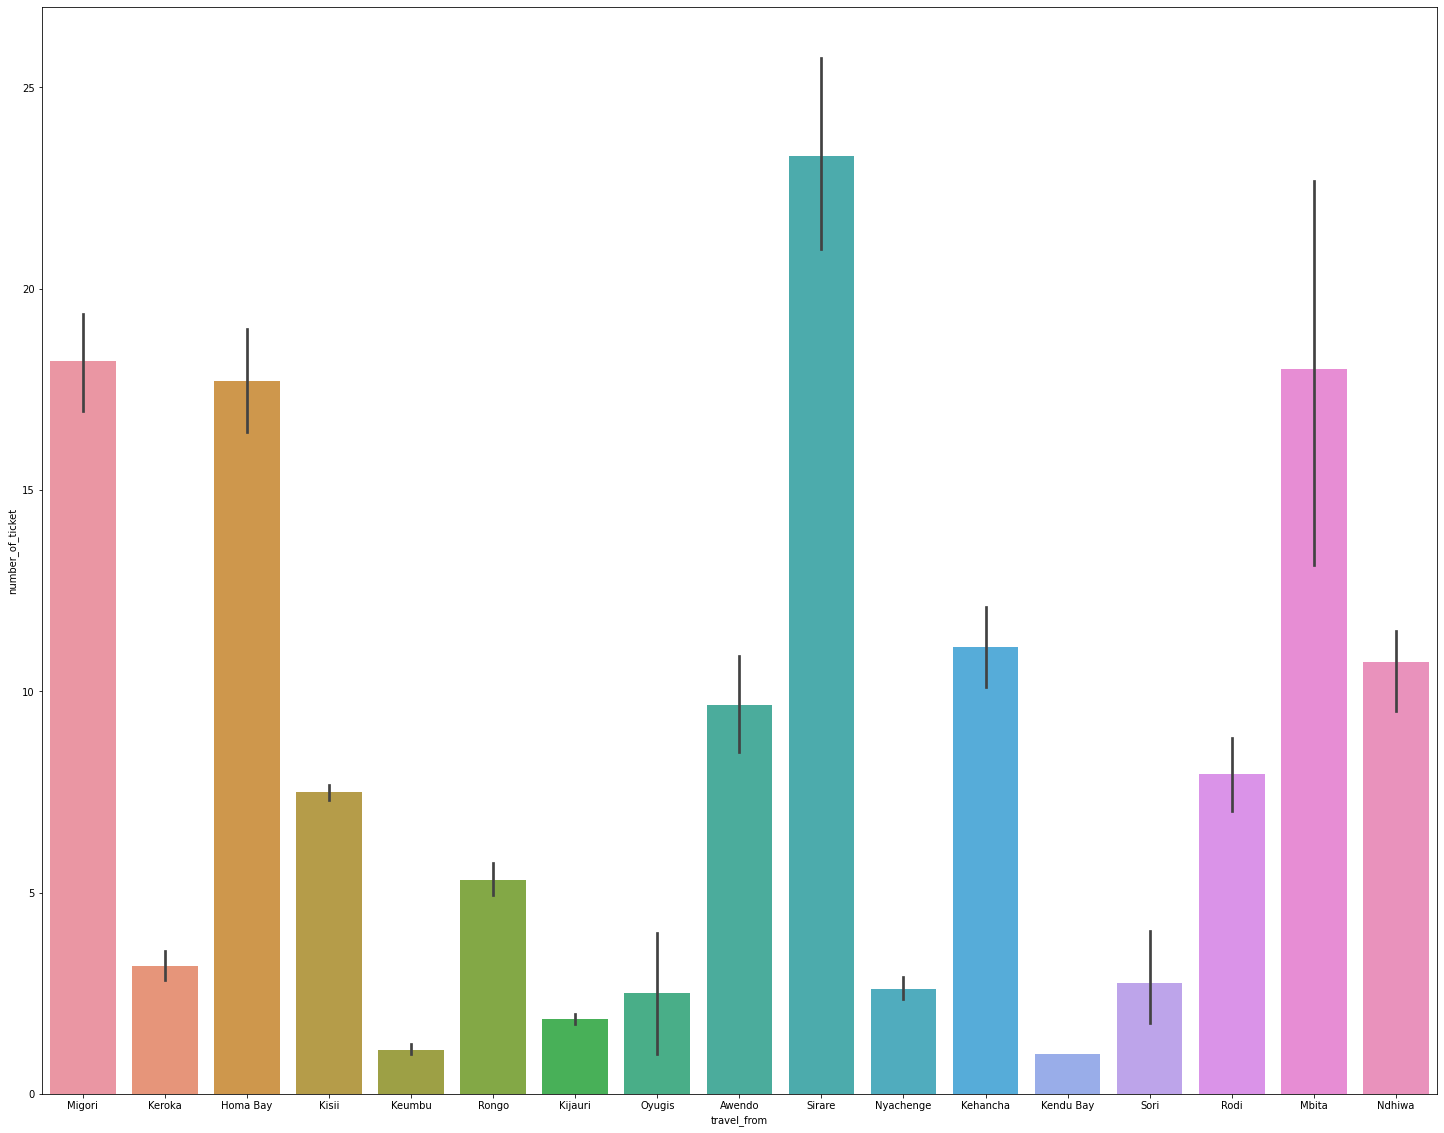

In [521]:
plt.figure(figsize=(25,20))

sp = sns.barplot(x= 'travel_from', y='number_of_ticket', data=Dataset)

# Feature Engineering

In [522]:
# make a new feature called Date.
Dataset['date']=Dataset['travel_date']+" "+Dataset['travel_time']


In [523]:
def time_features(Df):

  ''' This function takes dataframe as an argument and extracts the different features 
  from the date variable  of the dataset and finally returns the updated dataset.'''

  Df['date']=pd.to_datetime(Df['date'])
  Df['day_of_week']=Df['date'].dt.dayofweek
  Df['day_of_year']=Df['date'].dt.day_of_year
  Df['day_of_month']=Df['date'].dt.day
  Df['year_woy']=Df['date'].dt.year.astype(str)+Df['date'].dt.weekofyear.astype(str)
  Df['hour']=Df['date'].dt.hour
  Df['minute']=Df['date'].dt.minute
  Df['is_weekend']=Df['day_of_week'].apply( lambda x : 1 if x in [5,6] else 0)
  Df['year']=Df['date'].dt.year
  Df['quarter']=Df['date'].dt.quarter
  Df['month']=Df['date'].dt.month
  return Df

In [524]:
Dataset_new = time_features(Dataset)

In [525]:
Dataset_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


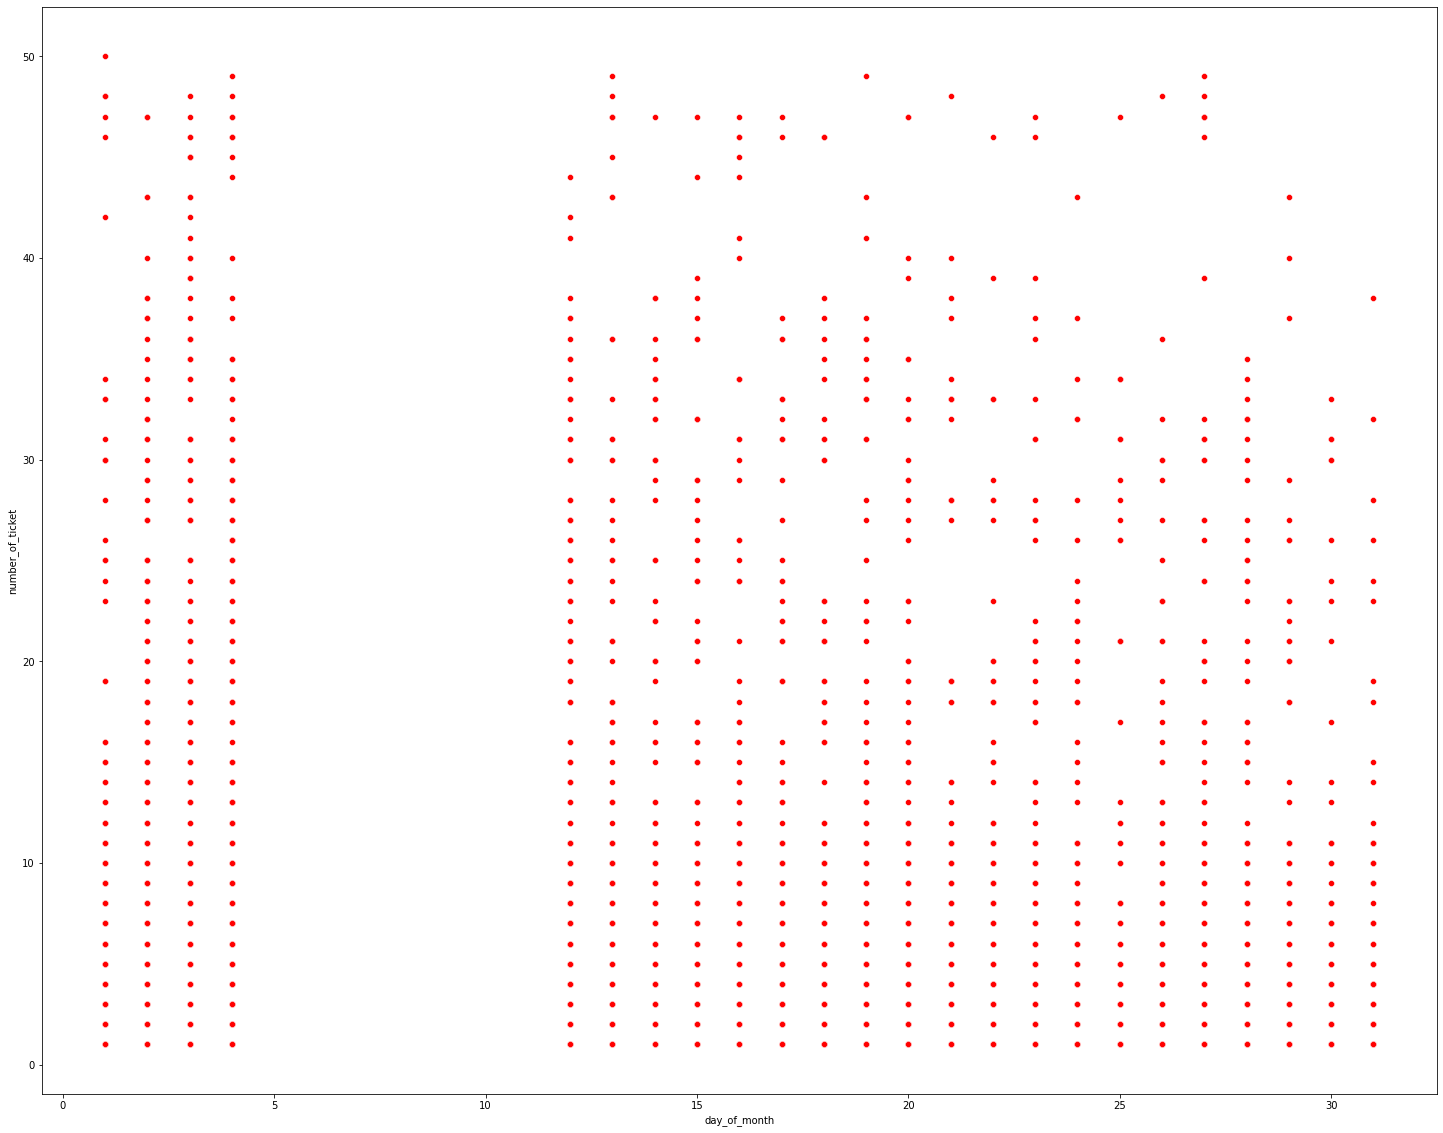

In [526]:
plt.figure(figsize=(25, 20))

sp = sns.scatterplot(x='day_of_month', y="number_of_ticket", data=Dataset, color='red')


* we can see that there is the gap between 5 to 11 in the day of the month.
* we can assume that there is official holyday of public transport between these days.
* we can say that the number of tickets in all the days of month are same.





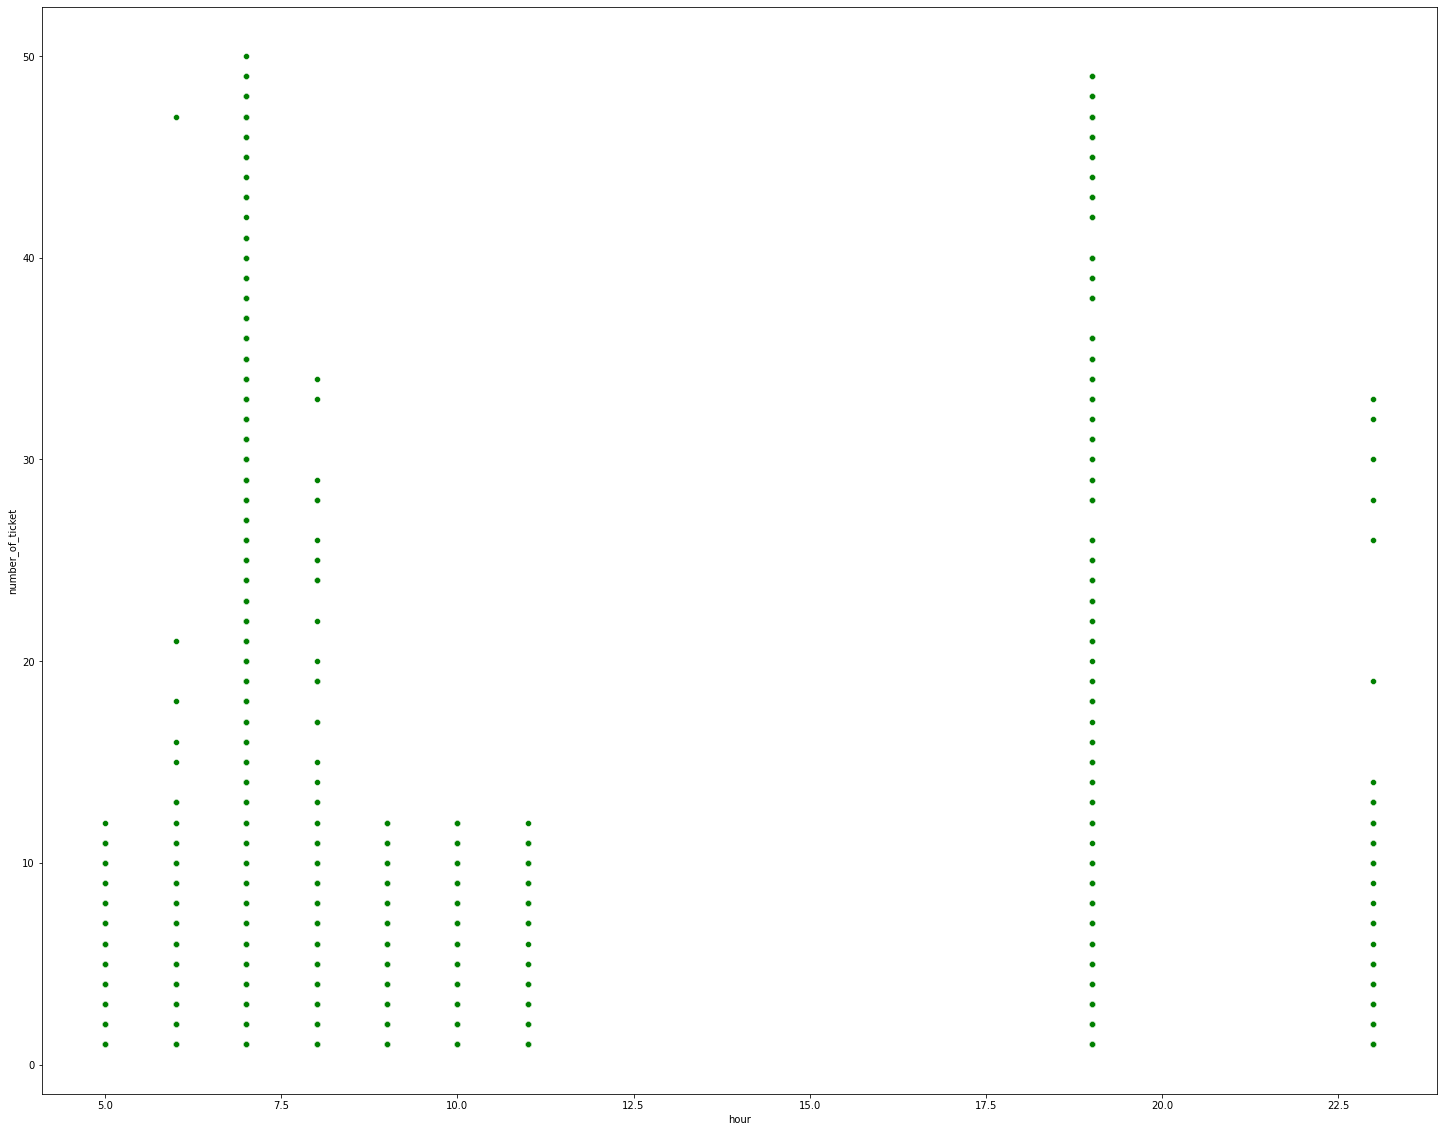

In [527]:
plt.figure(figsize=(25,20))

sp = sns.scatterplot(x='hour', y='number_of_ticket', data=Dataset, color='green')



*  From above plot we can say that there is no ride between 12PM to 5:30PM.
*  We can see that most of the tickets were sold at 7AM and 8PM and that seems true because in morning most of the people go to the work and office.



In [528]:
Dataset_new['travel_time'] = Dataset_new['travel_time'].str.split(':').apply(lambda x : int(x[0]) + int(x[1])/60)

In [529]:
Dataset_new['period'] = np.nan

Dataset_new.loc[Dataset_new.travel_time < 7 , 'period'] = 'em'
Dataset_new.loc[(Dataset_new.travel_time >= 7) & (Dataset_new.travel_time < 11), 'period'] = 'am'
Dataset_new.loc[(Dataset_new.travel_time >= 11) & (Dataset_new.travel_time < 15), 'period'] = 'mid'
Dataset_new.loc[(Dataset_new.travel_time >= 15) & (Dataset_new.travel_time < 19), 'period'] = 'eve'
Dataset_new.loc[(Dataset_new.travel_time >= 19) & (Dataset_new.travel_time < 24), 'period'] = 'pm'

pcount = dict(Dataset_new['period'].value_counts())
pcount

Dataset_new['hourly_travelers']= np.log1p(Dataset_new['period'].map(pcount))

dcount = dict(Dataset_new['day_of_year'].value_counts())
Dataset_new['daily_travelers'] = np.log1p(Dataset_new['day_of_year'].map(dcount))





In [530]:
Dataset_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [531]:
Dataset_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'period', 'hourly_travelers',
       'daily_travelers'],
      dtype='object')

In [532]:
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','houry_travelers','is_weekend','day_of_week']

In [533]:
New_Dataset = Dataset_new.copy()

In [534]:
New_Dataset.head(10)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.494743,3.871201
5,5781,27-11-17,7.150000,Homa Bay,Bus,49,26,2017-11-27 07:09:00,0,331,...,201748,7,9,0,2017,4,11,am,8.494743,3.871201
6,5784,20-04-18,5.166667,Kisii,shuttle,11,1,2018-04-20 05:10:00,4,110,...,201816,5,10,0,2018,2,4,em,6.896694,3.737670
7,5789,20-04-18,9.833333,Kisii,shuttle,11,1,2018-04-20 09:50:00,4,110,...,201816,9,50,0,2018,2,4,am,8.494743,3.737670
8,5790,20-04-18,7.100000,Kisii,Bus,49,2,2018-04-20 07:06:00,4,110,...,201816,7,6,0,2018,2,4,am,8.494743,3.737670
9,5791,20-04-18,6.000000,Kisii,shuttle,11,1,2018-04-20 06:00:00,4,110,...,201816,6,0,0,2018,2,4,em,6.896694,3.737670


In [535]:
New_Dataset.shape

(6249, 21)

In [536]:
New_Dataset.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [537]:
dict_cov={12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
New_Dataset['month'].replace(dict_cov,inplace=True)

In [538]:
New_Dataset.month.value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [539]:
New_Dataset.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [540]:
conv_dict = {17:2,19:2,26:3,27:3,20:2,18:2,16:2,15:2,14:2,13:2,4:1,28:2,31:3,30:3,29:3,25:3,24:3,23:3,22:3,21:3,12:1,3:1,2:1,1:2}
New_Dataset['day_of_month'].replace(conv_dict,inplace=True)

In [541]:
New_Dataset['day_of_month'].value_counts()

1    2496
2    2305
3    1448
Name: day_of_month, dtype: int64

In [542]:
New_Dataset.head(10)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,3,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,2,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,2,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,2,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,2,am,8.494743,3.871201
5,5781,27-11-17,7.150000,Homa Bay,Bus,49,26,2017-11-27 07:09:00,0,331,...,201748,7,9,0,2017,4,2,am,8.494743,3.871201
6,5784,20-04-18,5.166667,Kisii,shuttle,11,1,2018-04-20 05:10:00,4,110,...,201816,5,10,0,2018,2,2,em,6.896694,3.737670
7,5789,20-04-18,9.833333,Kisii,shuttle,11,1,2018-04-20 09:50:00,4,110,...,201816,9,50,0,2018,2,2,am,8.494743,3.737670
8,5790,20-04-18,7.100000,Kisii,Bus,49,2,2018-04-20 07:06:00,4,110,...,201816,7,6,0,2018,2,2,am,8.494743,3.737670
9,5791,20-04-18,6.000000,Kisii,shuttle,11,1,2018-04-20 06:00:00,4,110,...,201816,6,0,0,2018,2,2,em,6.896694,3.737670


In [543]:
# New_Data_characterization(New_Dataset)

In [544]:
#Let us find the difference between next and previous Buses

def find_difference_bw_bus(New_Data):
  New_Data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  New_Data["Time_gap_btw_0_1_next_bus"]=(New_Data["date"]-New_Data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  New_Data["Time_gap_btw_0_1_previous_bus"]=(New_Data["date"]-New_Data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  New_Data["Time_gap_btw_0_2_next_bus"]=(New_Data["date"]-New_Data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  New_Data["Time_gap_btw_0_2_previous_bus"]=(New_Data["date"]-New_Data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  New_Data["Time_gap_btw_0_3_next_bus"]=(New_Data["date"]-New_Data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  New_Data["Time_gap_btw_0_3_previous_bus"]=(New_Data["date"]-New_Data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  New_Data["Time_gap_btw_next_previous_bus"]=(New_Data.groupby(["travel_from"]).date.shift(-1)-New_Data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus","Time_gap_btw_next_previous_bus"]
  
  New_Data[cols]=New_Data.groupby(["travel_from"])[cols].fillna(method="ffill")
  New_Data[cols]=New_Data.groupby(["travel_from"])[cols].fillna(method="backfill")

  return New_Data

  

In [545]:
New_Data = find_difference_bw_bus(New_Dataset)

In [546]:
New_Data.isnull().sum()

ride_id                           0
travel_date                       0
travel_time                       0
travel_from                       0
car_type                          0
max_capacity                      0
number_of_ticket                  0
date                              0
day_of_week                       0
day_of_year                       0
day_of_month                      0
year_woy                          0
hour                              0
minute                            0
is_weekend                        0
year                              0
quarter                           0
month                             0
period                            0
hourly_travelers                  0
daily_travelers                   0
Time_gap_btw_0_1_next_bus         1
Time_gap_btw_0_1_previous_bus     1
Time_gap_btw_0_2_next_bus         3
Time_gap_btw_0_2_previous_bus     3
Time_gap_btw_0_3_next_bus         3
Time_gap_btw_0_3_previous_bus     3
Time_gap_btw_next_previous_b

Here we can see that there are some null values present in our Data so let us remove those null values.

In [547]:
New_Data.dropna(inplace=True)

In [548]:
New_Data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
502,6654,05-12-17,7.133333,Awendo,Bus,49,2,2017-05-12 07:08:00,4,132,...,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
5530,12926,01-04-18,7.133333,Awendo,Bus,49,20,2018-01-04 07:08:00,3,4,...,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
5533,12929,01-04-18,7.200000,Awendo,Bus,49,2,2018-01-04 07:12:00,3,4,...,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
5539,12935,01-04-18,7.216667,Awendo,Bus,49,9,2018-01-04 07:13:00,3,4,...,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
5528,12924,01-04-18,8.000000,Awendo,Bus,49,15,2018-01-04 08:00:00,3,4,...,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


In [549]:
from datetime import datetime
from datetime import timedelta


Now let us find the distance of each origin point from the distination point.

In [550]:
Distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,'Kijauri':271, 
            'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
            'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}

New_Data["travel_from_distance"] = New_Data.travel_from.map(Distance)


In [551]:
Time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 
        'Rongo':6*60+21,'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
        'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
New_Data["travel_from_time"] = New_Data.travel_from.map(Time)


In [552]:
New_Data['Speed']= New_Data.travel_from_time/New_Data.travel_from_distance


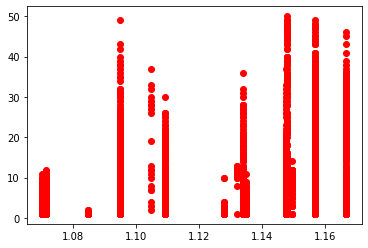

In [553]:
plt.scatter(New_Data['Speed'],New_Data['number_of_ticket'],color='red')

In [554]:
Time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
       'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
        'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in Time.keys(): 
    Time[key]=timedelta( minutes=Time[key])

# Find the date of traveling from origin 
New_Data["Date_of_traveling_from_origin"]=New_Data.travel_from.map(Time)

# Find the date of arrival at distination
New_Data["arrival_date"]=New_Data.date+ New_Data.Date_of_traveling_from_origin
New_Data["hod_arrived_date"]=New_Data["arrival_date"].dt.hour
New_Data["minute_arrived_date"]=New_Data["arrival_date"].dt.minute
del New_Data["Date_of_traveling_from_origin"],New_Data["arrival_date"]
New_Data["is_rush_hour"]=0
New_Data.loc[New_Data.hod_arrived_date.between(7,17),"is_rush_hour"]=1

**Encoding Categorical Features**

In [555]:
from sklearn import preprocessing 

#Import LabelEncoder
New_Data = pd.get_dummies(New_Data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
New_Data.replace(label_enc,inplace=True)

In [556]:
New_Data.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,year_woy,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,6654,05-12-17,7.133333,1,49,2,2017-05-12 07:08:00,4,132,201719,...,0,0,0,0,1,0,0,0,0,1
5530,12926,01-04-18,7.133333,1,49,20,2018-01-04 07:08:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5533,12929,01-04-18,7.200000,1,49,2,2018-01-04 07:12:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5539,12935,01-04-18,7.216667,1,49,9,2018-01-04 07:13:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5528,12924,01-04-18,8.000000,1,49,15,2018-01-04 08:00:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0


**Training The Models**

In [557]:
keys= ['ride_id']
Target_name='number_of_ticket'
not_used_cols=['ride_id','travel_time' ,'travel_date','date',
               'year_woy','max_capacity','number_of_ticket',
               'period']


In [558]:
Features = New_Data.drop(not_used_cols,axis=1).columns

In [559]:
Features

Index(['car_type', 'day_of_week', 'day_of_year', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'hourly_travelers', 'daily_travelers',
       'Time_gap_btw_0_1_next_bus', 'Time_gap_btw_0_1_previous_bus',
       'Time_gap_btw_0_2_next_bus', 'Time_gap_btw_0_2_previous_bus',
       'Time_gap_btw_0_3_next_bus', 'Time_gap_btw_0_3_previous_bus',
       'Time_gap_btw_next_previous_bus', 'travel_from_distance',
       'travel_from_time', 'Speed', 'hod_arrived_date', 'minute_arrived_date',
       'is_rush_hour', 'travel_from_Awendo', 'travel_from_Homa Bay',
       'travel_from_Kehancha', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'day_of_month_1', 'day_of_month_2',
       'day_of_month_3', 'month_1', 'month_2', 'month_3'],
      dtype='object

In [560]:
#importing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [561]:
New_Data[Features].head()

,car_type,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,hourly_travelers,daily_travelers,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,1,4,132,7,8,0,2017,2,8.494743,4.025352,...,0,0,0,0,1,0,0,0,0,1
5530,1,3,4,7,8,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0
5533,1,3,4,7,12,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0
5539,1,3,4,7,13,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0
5528,1,3,4,8,0,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0


**Linear Regression** 

In [562]:
## Math
import math

In [563]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [564]:
# importing
from sklearn.linear_model import LinearRegression

In [599]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in Features:
  used_cols.append(col)
  dataset_pr = New_Data[used_cols]
  X= dataset_pr.copy()
  y = New_Data['number_of_ticket']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  
  ## Predicting. 
  y_pred = model.predict(X_test)
  
  ##Find R-squared value.
  r2 = r2_score(y_test, y_pred)
  
  ## Find Adjusted R-squared value.
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test,y_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(r2)
print('Important features are: \n')
used_cols

Adjust_r2: 0.34765695420895815
Train score: 0.41530852557070086
Test score: 0.35462034431444234
0.35467983130536396
Important features are: 



['day_of_year',
 'car_type',
 'hour',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'travel_from_distance',
 'hod_arrived_date',
 'is_rush_hour',
 'travel_from_Homa Bay',
 'travel_from_Keroka',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'day_of_month_3',
 'month_1']

In [588]:
# Test Dataset Metrics
print_metrics(y_test, y_test_pred)

MSE is 48.43511958300652
RMSE is 6.959534437231166
RMSE is 0.35462034431444234
MAE is 4.747479632757994
MAPE is 165.60298149000852


**Implementing Lasso Regression**

In [589]:
# importing
from sklearn.linear_model import Lasso

In [590]:
X = New_Data[used_cols].copy()
y = New_Data['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
alphas = [0.01,0.025,0.5,0.75,1]
for alpha in alphas:
  lasso  = Lasso(alpha=alpha , max_iter= 3000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))

alpha:  0.01
test Score:  0.354766452435046
train Score:  0.414065801807304
alpha:  0.025
test Score:  0.35435023044808567
train Score:  0.41085774515027307
alpha:  0.5
test Score:  0.25765968253876326
train Score:  0.27225704876813794
alpha:  0.75
test Score:  0.2526270781831286
train Score:  0.26579766328306853
alpha:  1
test Score:  0.2521652206957059
train Score:  0.265106187320427


Here We can see that at alpha = 0.01 it give best out of those.

In [591]:
lasso  = Lasso(alpha=0.01 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [592]:
y_test_pred = lasso.predict(X_test)


print('MSE is {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE is {}'.format(math.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MAE is {}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE is 48.42415430972722
RMSE is 6.958746604793655
MAE is 4.741771572572294


In [593]:
r2 = r2_score(y_test, y_test_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.354766452435046
Adjusted R2 :  0.34780463877814116


**Ridge Regression**

In [594]:
#importing
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [595]:
# Hyperprarameter Tuning
X= New_Data[Features].copy()
y = New_Data['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [596]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -44.97449113861214


**Model Prediction**

In [597]:
# Model prediction analysis
y_pred_ridge = ridge_regressor.predict(X_test)
print(ridge_regressor.score(X_train,y_train))
print(ridge_regressor.score(X_test,y_test))

print_metrics(y_test, y_test_pred)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

-43.02051587042878
-48.38009063187631
MSE is 48.42415430972722
RMSE is 6.958746604793655
RMSE is 0.354766452435046
MAE is 4.741771572572294
MAPE is 164.49292736646717
R2 : 0.355353584282443
Adjusted R2 :  0.34129089598716666


**Training Gradient Boosting Regressor**

In [600]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in Features:
  used_cols.append(col)
  dataset_pr = New_Data[used_cols]
  X= dataset_pr.copy()
  y = New_Data['number_of_ticket']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  reg = GradientBoostingRegressor(random_state=0)
  reg.fit(X_train, y_train)
  
  ## Predicting. 
  y_pred = reg.predict(X_test)
  y_pred_train=reg.predict(X_train)
  

  ## Find Adjusted R-squared value.
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
 
 ##Find R-squared value.
    r2 = r2_score(y_test, y_pred)
    r2_for_train= r2_score(y_train,y_pred_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test,y_test)
  else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'r2_Test score: {r2}')
print(f'r2_train score: {r2_for_train}')
print_metrics(y_test, y_pred)
print('Important features are: \n')
used_cols

Adjust_r2: 0.604672199182078
Train score: 0.6763311371872496
Test score: 0.6085084709027759
r2_Test score: 0.6085084709027759
r2_train score: 0.6763311371872496
MSE is 29.390451961425605
RMSE is 5.421296151422241
RMSE is 0.6083833398036512
MAE is 3.540034943596906
MAPE is 113.29710598481704
Important features are: 



['day_of_year',
 'car_type',
 'day_of_week',
 'hour',
 'minute',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'Time_gap_btw_0_2_previous_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_next_previous_bus',
 'travel_from_distance',
 'minute_arrived_date',
 'travel_from_Awendo',
 'travel_from_Keroka',
 'travel_from_Kisii',
 'travel_from_Migori',
 'travel_from_Sirare']

In [601]:
r2

0.6085084709027759

In [602]:
adj_r2

0.6043519918310418